# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Observations

1.  City Latitude vs. Max Temperature - shows that the warmest tempratures are near the equator and it is only logical that the farther away you get from the equator - in either hemisphere - the cooler the temprature will be.  You do have to take into account the axis of the earth as currently in the norther hemisphere we are in the midst of summer while in the southern hemisphere we are in the midst os winter.

2.  Latitude vs. Humidity Plot - you see no pattern like in temprature as the you can still have higher humidity levels no matter what part of the world you live in.  For instance cities neer the water with warmer tempratures typically have a higher humidity level year round.  Also we have days with 100% humidity in Kansas City based on weater patterns such as a low preasure system bringing up warmer more humid tempratures - thats why we get a "heat index" which accounts for the humidity level and the actual temprature.

3.  When you do a side by side comparision of all the weather attributes studied the only one with a correlation is temprature simply because the equator is always closest to the sun and the north and south poles are farthest from the sun.



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

#setup list to hold response info
lat = []
lon = []
temp_max = []
humidity = []
cloud = []
wind = []
country = []
date = []
good_city=[]


print('Beginning Data Retrieval')
print('-----------------------------------------------')
 
for city in cities:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'

    # Get weather data
    try:
        print(f'City check: {city}  : ' + query_url )
        weather_response = requests.get(query_url).json()
        lat.append(weather_response['coord']['lat']) 
        lon.append(weather_response['coord']['lon'])            
        temp_max.append(weather_response['main']['temp_max'])   
        humidity.append(weather_response['main']['humidity'])
        cloud.append(weather_response['clouds']['all'])
        wind.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        good_city.append(weather_response['name'])
        date.append(weather_response['dt'])
    except:
         print(f'City check: {city}  : NOT FOUND!' + query_url)
        
                
    

Beginning Data Retrieval
-----------------------------------------------
City check: kelapa sawit  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=kelapa sawit&units=imperial
City check: gisborne  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=gisborne&units=imperial
City check: mangan  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=mangan&units=imperial
City check: cascais  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=cascais&units=imperial
City check: port alfred  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=port alfred&units=imperial
City check: nome  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=nome&units=imperial
City check: cape town  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&

City check: albany  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=albany&units=imperial
City check: acarau  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=acarau&units=imperial
City check: akureyri  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=akureyri&units=imperial
City check: marcona  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=marcona&units=imperial
City check: marcona  : NOT FOUND!http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=marcona&units=imperial
City check: matara  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=matara&units=imperial
City check: chokurdakh  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=chokurdakh&units=imperial
City check: tiarei  : http://api.openweathermap.or

City check: basco  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=basco&units=imperial
City check: bluff  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=bluff&units=imperial
City check: svistov  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=svistov&units=imperial
City check: svistov  : NOT FOUND!http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=svistov&units=imperial
City check: tuktoyaktuk  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=tuktoyaktuk&units=imperial
City check: cartagena del chaira  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=cartagena del chaira&units=imperial
City check: formoso do araguaia  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=formoso do araguaia&units=imperial
Ci

City check: nizhnyaya salda  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=nizhnyaya salda&units=imperial
City check: half moon bay  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=half moon bay&units=imperial
City check: darnah  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=darnah&units=imperial
City check: siverek  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=siverek&units=imperial
City check: castro  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=castro&units=imperial
City check: chuy  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=chuy&units=imperial
City check: cabo san lucas  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=cabo san lucas&units=imperial
City check: le pont-de-claix  

City check: barentsburg  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=barentsburg&units=imperial
City check: barentsburg  : NOT FOUND!http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=barentsburg&units=imperial
City check: camacha  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=camacha&units=imperial
City check: port blair  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=port blair&units=imperial
City check: talnakh  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=talnakh&units=imperial
City check: bontang  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=bontang&units=imperial
City check: rio gallegos  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=rio gallegos&units=imperial
City check: mokhotlo

City check: bonthe  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=bonthe&units=imperial
City check: morehead  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=morehead&units=imperial
City check: awallan  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=awallan&units=imperial
City check: altamont  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=altamont&units=imperial
City check: isangel  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=isangel&units=imperial
City check: saint-pierre  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=saint-pierre&units=imperial
City check: geraldton  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=geraldton&units=imperial
City check: palabuhanratu  : http://api.openwe

City check: kariapatti  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=kariapatti&units=imperial
City check: shingu  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=shingu&units=imperial
City check: mulchen  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=mulchen&units=imperial
City check: zhanatas  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=zhanatas&units=imperial
City check: zhanatas  : NOT FOUND!http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=zhanatas&units=imperial
City check: hervey bay  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=hervey bay&units=imperial
City check: buta  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=buta&units=imperial
City check: sibolga  : http://api.openweathe

City check: quatre cocos  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=quatre cocos&units=imperial
City check: khatanga  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=khatanga&units=imperial
City check: lingao  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=lingao&units=imperial
City check: fray bentos  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=fray bentos&units=imperial
City check: bandarbeyla  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=bandarbeyla&units=imperial
City check: pangody  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=pangody&units=imperial
City check: beypur  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=beypur&units=imperial
City check: beypur  : NOT FOUND!http:/

City check: batagay-alyta  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=batagay-alyta&units=imperial
City check: great bend  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=great bend&units=imperial
City check: cockburn harbour  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=cockburn harbour&units=imperial
City check: cockburn harbour  : NOT FOUND!http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=cockburn harbour&units=imperial
City check: naze  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=naze&units=imperial
City check: lodja  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=lodja&units=imperial
City check: bairiki  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=bairiki&units=imperial
City che

City check: bereda  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=bereda&units=imperial
City check: paita  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=paita&units=imperial
City check: shenjiamen  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=shenjiamen&units=imperial
City check: stepnogorsk  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=stepnogorsk&units=imperial
City check: villa carlos paz  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=villa carlos paz&units=imperial
City check: taybad  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=taybad&units=imperial
City check: kondinskoye  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=kondinskoye&units=imperial
City check: ust-nera  : http:/

City check: bage  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=bage&units=imperial
City check: haines junction  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=haines junction&units=imperial
City check: samalaeulu  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=samalaeulu&units=imperial
City check: samalaeulu  : NOT FOUND!http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=samalaeulu&units=imperial
City check: wanning  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=wanning&units=imperial
City check: barsovo  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=barsovo&units=imperial
City check: balimo  : http://api.openweathermap.org/data/2.5/weather?appid=ee723daaad99c4eaee4712d46a6a7eab&q=balimo&units=imperial
City check: balimo  : NOT FOUND!

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": good_city,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}

df_weather_data = pd.DataFrame(weather_dict)
df_weather_data.to_csv(output_data_file)
df_weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kelapa Sawit,1.67,103.53,77.00,94,20,1.12,MY,1598811320
1,Gisborne,-38.65,178.00,43.00,92,0,3.00,NZ,1598811304
2,Mangan,27.52,88.53,76.24,59,98,0.67,IN,1598811320
3,Cascais,38.70,-9.42,72.00,46,0,27.51,PT,1598811180
4,Port Alfred,-33.59,26.89,52.00,68,32,12.06,ZA,1598811321


In [6]:
df_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.733599,21.574681,67.693156,69.109929,46.739362,8.648670,1.598811e+09
std,33.841953,93.212346,15.543862,20.381407,36.445943,5.870406,7.554478e+01
min,-54.800000,-175.200000,27.480000,3.000000,0.000000,0.670000,1.598811e+09
25%,-7.912500,-61.740000,53.600000,58.000000,12.000000,4.327500,1.598811e+09
50%,26.320000,24.665000,71.435000,74.000000,40.000000,7.000000,1.598811e+09
75%,50.575000,108.390000,79.377500,83.250000,81.250000,11.410000,1.598811e+09
max,78.220000,179.320000,104.000000,100.000000,100.000000,30.890000,1.598811e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

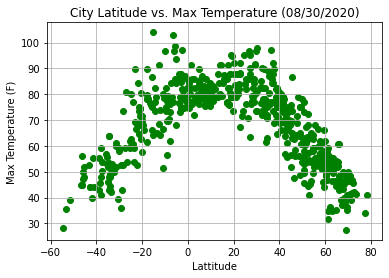

In [8]:
today = dt.datetime.today().strftime('%m/%d/%Y')
header = "City Latitude vs. Max Temperature (" + today + ")"

x = df_weather_data['Lat']
y = df_weather_data['Max Temp']

plt.title(header)
plt.xlabel('Lattitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True)
plt.scatter(x,y, marker="o", color="green")
plt.savefig("../images/latvstempplot.png")
plt.show()


### Logically it would seam and the graph shows the farther you get from the equator your maximum temprature would be lower.

## Latitude vs. Humidity Plot

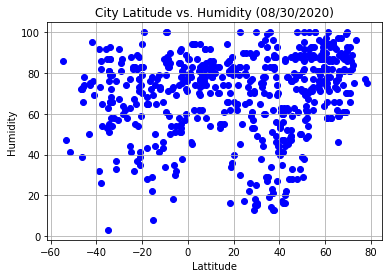

In [9]:
header = "City Latitude vs. Humidity (" + today + ")"

x = df_weather_data['Lat']
y = df_weather_data['Humidity']

plt.title(header)
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.grid(b=True)
plt.scatter(x,y, marker="o", color="Blue")
plt.savefig("../images/latvshumidplot.png")
plt.show()

# This scatter plot doesn't show any real relationshiop between lattitude and humidity.

## Latitude vs. Cloudiness Plot

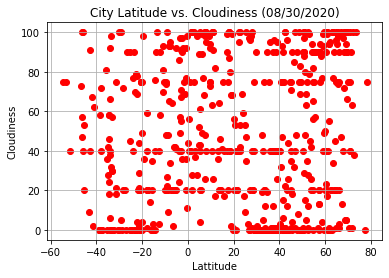

In [10]:
header = "City Latitude vs. Cloudiness (" + today + ")"

x = df_weather_data['Lat']
y = df_weather_data['Cloudiness']

plt.title(header)
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
plt.grid(b=True)
plt.scatter(x,y, marker="o", color="red")
plt.savefig("../images/latvscloudplot.png")
plt.show()

# This scatter plot doesn't show any real relationshiop between lattitude and cloudiness.

## Latitude vs. Wind Speed Plot

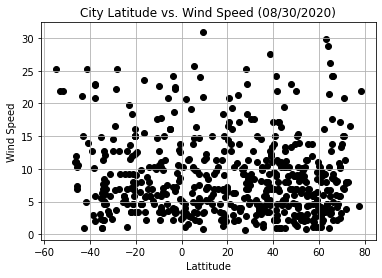

In [11]:
header = "City Latitude vs. Wind Speed (" + today + ")"

x = df_weather_data['Lat']
y = df_weather_data['Wind Speed']

plt.title(header)
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.scatter(x,y, marker="o", color="Black")
plt.savefig("../images/latvswindplot.png")
plt.show()

# This scatter plot doesn't show any real relationshiop between lattitude and wind speed.

## Linear Regression

In [14]:
df_northern = df_weather_data.loc[df_weather_data['Lat']>0]
df_southern = df_weather_data.loc[df_weather_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6770337637702086


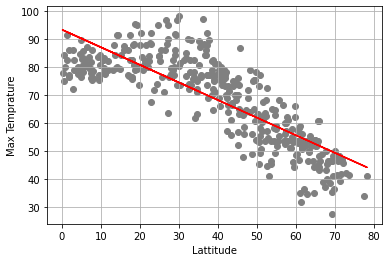

In [15]:
x_values = df_northern["Lat"]
y_values = df_northern['Max Temp']

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#create plot
plt.scatter(x_values,y_values, marker="o", color="gray")
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lattitude')
plt.ylabel('Max Temprature')
plt.grid(b=True)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is {rvalue**2}")
plt.savefig("../images/nlatvstempreg.png")

plt.show()
# This scatter plot shows a good correlation between the closer to the equator the higher the maximum temprature.  
# The maximum temprature decreases the close you get to the north pole.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6719115048185409


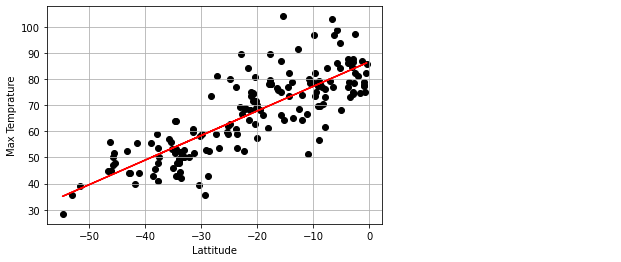

In [16]:
x_values = df_southern["Lat"]
y_values = df_southern['Max Temp']

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#create plot
plt.scatter(x_values,y_values, marker="o", color="Black")
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lattitude')
plt.ylabel('Max Temprature')
plt.grid(b=True)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is {rvalue**2}")
plt.savefig("../images/slatvstempreg.png")
plt.show()

# This scatter plot shows a good correlation between the closer to the equator the higher the maximum temprature.  
# The maximum temprature decreases the close you get to the south pole.  Remember in the southern hemisphere the 
# lattitude numbers are less than zero.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.01519473074144384


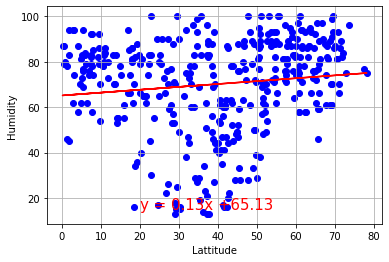

In [17]:
x_values = df_northern["Lat"]
y_values = df_northern['Humidity']

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#create plot
plt.scatter(x_values,y_values, marker="o", color="Blue")
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.grid(b=True)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is {rvalue**2}")
plt.savefig("../images/nlatvshumidreg.png")
plt.show()

# This scatter plot shows a no correlation/regression between the humidity and lattitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 1.8379186908857047e-06


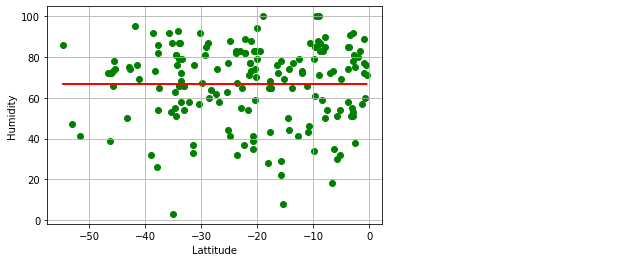

In [18]:
x_values = df_southern["Lat"]
y_values = df_southern['Humidity']

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#create plot
plt.scatter(x_values,y_values, marker="o", color="green")
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.grid(b=True)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is {rvalue**2}")
plt.savefig("../images/slatvshumidreg.png")
plt.show()

# This scatter plot shows a no correlation/regression between the humidity and lattitude in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0002070655186650442


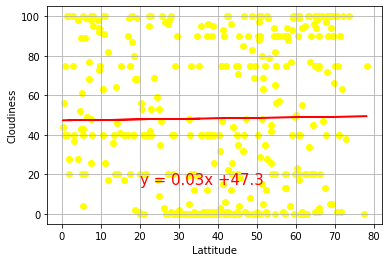

In [19]:
x_values = df_northern["Lat"]
y_values = df_northern['Cloudiness']

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#create plot
plt.scatter(x_values,y_values, marker="o", color="Yellow")
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
plt.grid(b=True)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is {rvalue**2}")
plt.savefig("../images/nlatvscloudreg.png")
plt.show()

# This scatter plot shows a no correlation/regression between the cloudiness and lattitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.018008106701173737


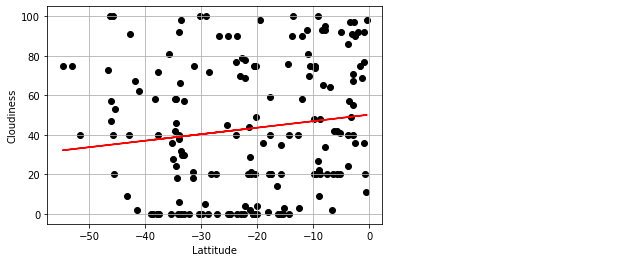

In [20]:
x_values = df_southern["Lat"]
y_values = df_southern['Cloudiness']

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#create plot
plt.scatter(x_values,y_values, marker="o", color="Black")
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
plt.grid(b=True)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is {rvalue**2}")
plt.savefig("../images/slatvscloudreg.png")
plt.show()

# This scatter plot shows a no correlation/regression between the cloudiness and lattitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0002821696246195876


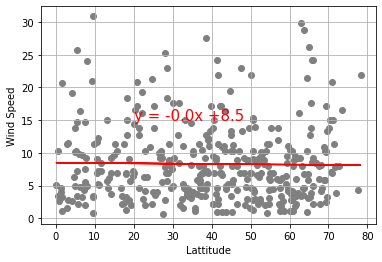

In [21]:
x_values = df_northern["Lat"]
y_values = df_northern['Wind Speed']

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#create plot
plt.scatter(x_values,y_values, marker="o", color="Gray")
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is {rvalue**2}")
plt.savefig("../images/nlatvswindreg.png")
plt.show()

# This scatter plot shows a no correlation/regression between the wind speed and lattitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.00979381639714777


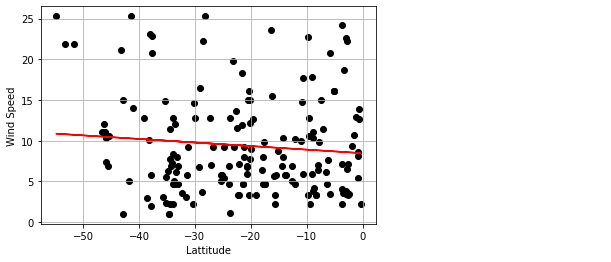

In [22]:
x_values = df_southern["Lat"]
y_values = df_southern['Wind Speed']

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#create plot
plt.scatter(x_values,y_values, marker="o", color="Black")
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is {rvalue**2}")
plt.savefig("../images/slatvswindreg.png")
plt.show()

# This scatter plot shows a no correlation/regression between the windspeed and lattitude in the southern hemisphere.